# Introduction to Convolutional Neural Networks and Computer Vision with Tesnorflow

Computer vision is the practice of writing algorithms wich can discover patterns in visual data. Such as the camera of self-driving car recognizing the car in front.

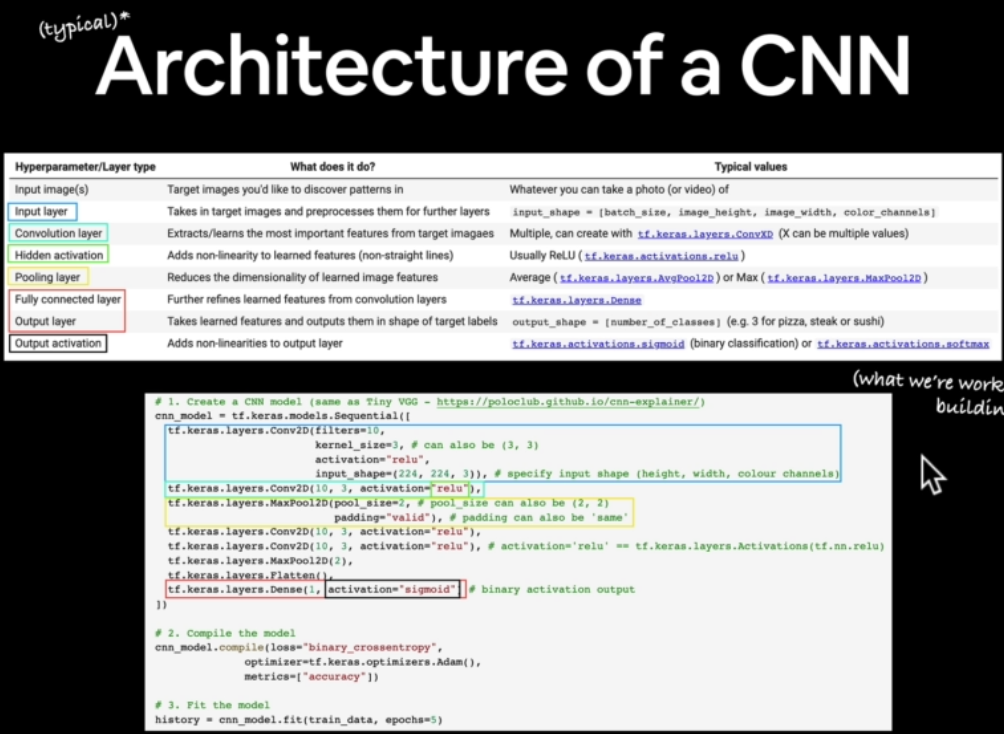

## Get the data

The images we're working wth are from the [Food101 dataset](https://www.kaggle.com/datasets/dansbecker/food-101) (101 different classes of food) 
It's modified to only use two classes (pizza 🍕 and steak 🍖) using the [image_data_modification](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb) notebook.



In [26]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-08-04 14:44:00--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   178MB/s    in 0.6s    

2022-08-04 14:44:01 (178 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project.. this usually means visualizing many samples of your data.

In [27]:
!ls pizza_steak # ls stands for list

test  train


In [28]:
!ls pizza_steak/train/

pizza  steak


In [29]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [30]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [31]:
# Anoter way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, first let's get the class names programmaticallt.

In [32]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted((item.name for item in data_dir.glob("*")))) # Created a list of class_names from the subdirectory
# class_names = class_names[1:] # Remove .DS_store
print(class_names) # [1:] = one onwards

['pizza' 'steak']


In [33]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  # Print the shape, this is important in ML
  print(f"Image shape: {img.shape}") # Show the shape of the image

  return img

['1049459.jpg']
Image shape: (512, 512, 3)


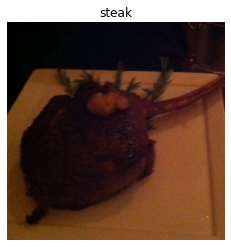

In [34]:
# View a random image from the dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [35]:
img

array([[[  2,   4,   1],
        [  2,   4,   1],
        [  2,   4,   1],
        ...,
        [ 23,  14,  19],
        [ 22,  13,  18],
        [ 23,  14,  19]],

       [[  2,   4,   1],
        [  2,   4,   1],
        [  2,   4,   1],
        ...,
        [ 23,  12,  18],
        [ 22,  13,  18],
        [ 23,  14,  19]],

       [[  1,   3,   0],
        [  1,   3,   0],
        [  1,   3,   0],
        ...,
        [ 23,  12,  18],
        [ 23,  12,  18],
        [ 25,  14,  20]],

       ...,

       [[109,  67,  19],
        [113,  71,  23],
        [123,  81,  33],
        ...,
        [126,  72,  25],
        [126,  72,  25],
        [130,  76,  29]],

       [[115,  75,  26],
        [110,  70,  21],
        [114,  74,  25],
        ...,
        [133,  77,  30],
        [131,  75,  28],
        [135,  79,  30]],

       [[ 99,  58,  12],
        [ 94,  53,   7],
        [107,  67,  18],
        ...,
        [139,  83,  36],
        [131,  75,  26],
        [129,  73,  24]]

In [36]:
# Make a tensor of the img array
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[  2,   4,   1],
        [  2,   4,   1],
        [  2,   4,   1],
        ...,
        [ 23,  14,  19],
        [ 22,  13,  18],
        [ 23,  14,  19]],

       [[  2,   4,   1],
        [  2,   4,   1],
        [  2,   4,   1],
        ...,
        [ 23,  12,  18],
        [ 22,  13,  18],
        [ 23,  14,  19]],

       [[  1,   3,   0],
        [  1,   3,   0],
        [  1,   3,   0],
        ...,
        [ 23,  12,  18],
        [ 23,  12,  18],
        [ 25,  14,  20]],

       ...,

       [[109,  67,  19],
        [113,  71,  23],
        [123,  81,  33],
        ...,
        [126,  72,  25],
        [126,  72,  25],
        [130,  76,  29]],

       [[115,  75,  26],
        [110,  70,  21],
        [114,  74,  25],
        ...,
        [133,  77,  30],
        [131,  75,  28],
        [135,  79,  30]],

       [[ 99,  58,  12],
        [ 94,  53,   7],
        [107,  67,  18],
        ...,
        [139,  83,  3

In [37]:
# View the image shape
img.shape # returns width, height, colour channels

(512, 512, 3)

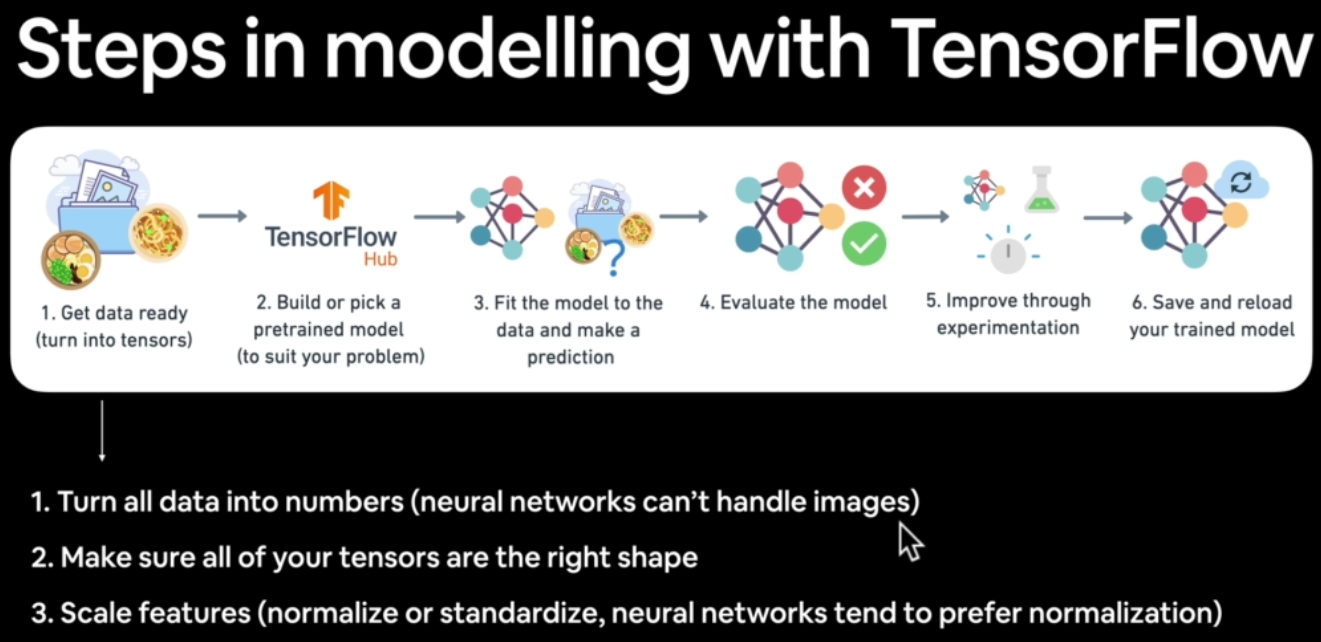

🔑**Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255. (Since 255 is the maximum pixel value).

In [38]:
# Get all the numbers in the input tensor between 0 and 1, normalization or scaling
img/255. # Divide with 255, the "." at the end turns it into a float

array([[[0.00784314, 0.01568627, 0.00392157],
        [0.00784314, 0.01568627, 0.00392157],
        [0.00784314, 0.01568627, 0.00392157],
        ...,
        [0.09019608, 0.05490196, 0.0745098 ],
        [0.08627451, 0.05098039, 0.07058824],
        [0.09019608, 0.05490196, 0.0745098 ]],

       [[0.00784314, 0.01568627, 0.00392157],
        [0.00784314, 0.01568627, 0.00392157],
        [0.00784314, 0.01568627, 0.00392157],
        ...,
        [0.09019608, 0.04705882, 0.07058824],
        [0.08627451, 0.05098039, 0.07058824],
        [0.09019608, 0.05490196, 0.0745098 ]],

       [[0.00392157, 0.01176471, 0.        ],
        [0.00392157, 0.01176471, 0.        ],
        [0.00392157, 0.01176471, 0.        ],
        ...,
        [0.09019608, 0.04705882, 0.07058824],
        [0.09019608, 0.04705882, 0.07058824],
        [0.09803922, 0.05490196, 0.07843137]],

       ...,

       [[0.42745098, 0.2627451 , 0.0745098 ],
        [0.44313725, 0.27843137, 0.09019608],
        [0.48235294, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [39]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called preprocessing/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224), # The size we want all of our images to be
                                               class_mode= "binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  #tf.keras.layers.Activations(tf.nn.relu), # Another way to do it as the line above
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs = 5,
                        steps_per_epoch=len(train_data), # 47 steps per epoch
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 11s 205ms/step - loss: 0.5617 - accuracy: 0.6913 - val_loss: 0.3904 - val_accuracy: 0.8260
Epoch 2/5
47/47 [==============================] - 9s 195ms/step - loss: 0.4263 - accuracy: 0.8013 - val_loss: 0.3309 - val_accuracy: 0.8660
Epoch 3/5
47/47 [==============================] - 9s 198ms/step - loss: 0.3768 - accuracy: 0.8373 - val_loss: 0.3275 - val_accuracy: 0.8540
Epoch 4/5
47/47 [==============================] - 9s 195ms/step - loss: 0.3335 - accuracy: 0.8527 - val_loss: 0.3100 - val_accuracy: 0.8760
Epoch 5/5
47/47 [==============================] - 9s 197ms/step - loss: 0.2904 - accuracy: 0.8860 - val_loss: 0.2969 - val_accuracy: 0.8700


🔑 **Note:** If the above cell is taking longer than ~10 seconds per epoch, use the **GPU** to speed things up by x5

In [40]:
model_1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

## Using the same model as before

In [41]:
# Set seed
tf.random.set_seed(42)

# Build the model from TenosrFlow website
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")  
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 186ms/step - loss: 0.8313 - accuracy: 0.5047 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 181ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 9s 193ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 9s 191ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 186ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [42]:
# Try upgrading the model above

# Set seed
tf.random.set_seed(42)

# Build the model from TenosrFlow website
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")  
])

# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=100,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/100
47/47 [==============================] - 9s 192ms/step - loss: 4.0259 - accuracy: 0.6120 - val_loss: 1.3102 - val_accuracy: 0.5700
Epoch 2/100
47/47 [==============================] - 9s 186ms/step - loss: 0.6777 - accuracy: 0.7093 - val_loss: 0.5110 - val_accuracy: 0.7660
Epoch 3/100
47/47 [==============================] - 9s 184ms/step - loss: 0.6577 - accuracy: 0.7207 - val_loss: 0.5736 - val_accuracy: 0.7260
Epoch 4/100
47/47 [==============================] - 9s 182ms/step - loss: 0.5438 - accuracy: 0.7713 - val_loss: 0.4534 - val_accuracy: 0.7740
Epoch 5/100
47/47 [==============================] - 9s 184ms/step - loss: 0.4875 - accuracy: 0.7727 - val_loss: 0.7342 - val_accuracy: 0.6280
Epoch 6/100
47/47 [==============================] - 9s 186ms/step - loss: 0.4349 - accuracy: 0.7967 - val_loss: 0.4274 - val_accuracy: 0.8020
Epoch 7/100
47/47 [==============================] - 9s 186ms/step - loss: 0.4394 - accuracy: 0.8193 - val_loss: 0.4648 - val_accuracy: 0.7960

In [43]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 150528)            0         
                                                                 
 dense_20 (Dense)            (None, 4)                 602116    
                                                                 
 dense_21 (Dense)            (None, 4)                 20        
                                                                 
 dense_22 (Dense)            (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terrebly. Time to try to improve it ^^

In [44]:
from tensorflow.python.eager.monitoring import Metric
# Set random seed
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 192ms/step - loss: 3.1753 - accuracy: 0.6200 - val_loss: 0.6180 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 9s 187ms/step - loss: 1.0077 - accuracy: 0.6953 - val_loss: 0.5849 - val_accuracy: 0.7460
Epoch 3/5
47/47 [==============================] - 9s 185ms/step - loss: 0.6279 - accuracy: 0.7313 - val_loss: 0.4895 - val_accuracy: 0.7580
Epoch 4/5
47/47 [==============================] - 9s 188ms/step - loss: 0.5359 - accuracy: 0.7533 - val_loss: 0.7296 - val_accuracy: 0.6320
Epoch 5/5
47/47 [==============================] - 10s 213ms/step - loss: 0.5498 - accuracy: 0.7473 - val_loss: 0.4678 - val_accuracy: 0.7880


In [45]:
# Get a summary of model_4
model_4.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 150528)            0         
                                                                 
 dense_27 (Dense)            (None, 100)               15052900  
                                                                 
 dense_28 (Dense)            (None, 100)               10100     
                                                                 
 dense_29 (Dense)            (None, 100)               10100     
                                                                 
 dense_30 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [46]:
# model_4 have 484 times more params than model_1 but is still outperformed by it. Power of CNN in computer vision
15000000/31000

483.8709677419355

🔑**Note:** You can think of trainable paraeters as **patterns a model can learn from data**. Intuitively, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network (CNN) seeks to sort out and learn the most important patterns in an image.** So even though there are less learnable paraeters in our convolutional neural network, these are often more helpful in dechipering between different **features** in an image. 
* Check out [CNN Explainer](https://poloclub.github.io/cnn-explainer/) for more reading.

## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing)
3. Create a model (start with a basline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat or baseline)
7. Repeat until satisfied (experiment, experiment, experiment)


### 1. Become one with the data

['822550.jpg']
Image shape: (384, 512, 3)
['2667824.jpg']
Image shape: (384, 512, 3)


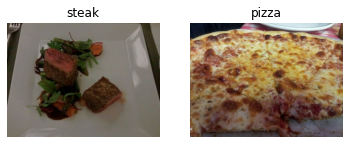

In [48]:
# Visualize the data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")